# **DATA LOADING**

Importing Libraries

In [122]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [123]:
# Load dataset
df = pd.read_csv("C:/syeda aliza arshad/project/New Microsoft Excel Worksheet (5).csv", parse_dates=["TrnsDate"])

df.head(10)

C:\Users\SyedArshad\AppData\Local\Temp\ipykernel_17876\4245470351.py:2: DtypeWarning: Columns (2,3,4,5,6,7,8,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/syeda aliza arshad/project/New Microsoft Excel Worksheet (5).csv", parse_dates=["TrnsDate"])


,TrnsNo,TrnsDate,Customer Id,Customer Name,City,Country,ProdId,ProdDesc,Unit,Qty,Rate,Amount
0,23080001.0,02-08-2023,C-0004,Jimmy Gomez,NaN,NaN,04-0003,Accounts Plus Maintenance Charges,NaN,1.0,2.857142857,2.857142857
1,23080001.0,02-08-2023,C-0004,Amanda Long,NaN,NaN,04-0003,Accounts Plus Maintenance Charges,NaN,1.0,2.857142857,2.857142857
2,23080001.0,02-08-2023,C-0004,Jill Sandoval,NaN,NaN,04-0003,Accounts Plus Maintenance Charges,NaN,1.0,128565.7143,128565.7143
3,23080002.0,08-08-2023,C-0076,Ashley Coleman,Karachi,Pakistan,04-0008,Accounts Plus Business Suite,NOS,1.0,131428.5714,131428.5714
4,23090001.0,13-09-2023,C-0016,Janet Browning,NaN,NaN,04-0008,Accounts Plus Business Suite,NOS,1.0,2.857142857,2.857142857
5,23090001.0,13-09-2023,C-0016,Natalie Griffin,NaN,NaN,04-0008,Accounts Plus Business Suite,NOS,1.0,57142.85714,57142.85714
6,23090001.0,13-09-2023,C-0016,Anna Brooks,NaN,NaN,04-0008,Accounts Plus Business Suite,NOS,1.0,100000,100000
7,23090001.0,13-09-2023,C-0016,Tyrone Rubio,NaN,NaN,04-0008,Accounts Plus Business Suite,NOS,1.0,2.857142857,2.857142857
8,23090001.0,13-09-2023,C-0016,Anna Sanders,NaN,NaN,04-0008,Accounts Plus Business Suite,NOS,1.0,100000,100000
9,23090001.0,13-09-2023,C-0016,Jack Zimmerman,NaN,NaN,04-0008,Accounts Plus Business Suite,NOS,1.0,2.857142857,2.857142857


In [3]:
df.tail(10)

,TrnsNo,TrnsDate,Customer Id,Customer Name,City,Country,ProdId,ProdDesc,Unit,Qty,Rate,Amount
1048565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1048566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1048567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1048568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1048569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1048574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


# ***PREPROCESSED AND CLEANING THE DATA***

In [138]:
# Drop columns that are not relevant for sales prediction
df = df.drop(['TrnsNo', 'Customer Id', 'Customer Name', 'City', 'Country', 'Unit', 'Amount'], axis=1)
df.info()

KeyError: "['TrnsNo', 'Customer Id', 'Customer Name', 'City', 'Country', 'Unit'] not found in axis"

In [6]:
df.head(10)

,TrnsDate,ProdId,ProdDesc,Qty,Rate
0,02-08-2023,04-0003,Accounts Plus Maintenance Charges,1.0,2.857142857
1,02-08-2023,04-0003,Accounts Plus Maintenance Charges,1.0,2.857142857
2,02-08-2023,04-0003,Accounts Plus Maintenance Charges,1.0,128565.7143
3,08-08-2023,04-0008,Accounts Plus Business Suite,1.0,131428.5714
4,13-09-2023,04-0008,Accounts Plus Business Suite,1.0,2.857142857
5,13-09-2023,04-0008,Accounts Plus Business Suite,1.0,57142.85714
6,13-09-2023,04-0008,Accounts Plus Business Suite,1.0,100000
7,13-09-2023,04-0008,Accounts Plus Business Suite,1.0,2.857142857
8,13-09-2023,04-0008,Accounts Plus Business Suite,1.0,100000
9,13-09-2023,04-0008,Accounts Plus Business Suite,1.0,2.857142857


In [17]:
df.tail(10)

,TrnsDate,ProdId,ProdDesc,Qty,Rate
1048565,NaN,NaN,NaN,NaN,0
1048566,NaN,NaN,NaN,NaN,0
1048567,NaN,NaN,NaN,NaN,0
1048568,NaN,NaN,NaN,NaN,0
1048569,NaN,NaN,NaN,NaN,0
1048570,NaN,NaN,NaN,NaN,0
1048571,NaN,NaN,NaN,NaN,0
1048572,NaN,NaN,NaN,NaN,0
1048573,NaN,NaN,NaN,NaN,0
1048574,NaN,NaN,NaN,NaN,0


In [12]:
df.tail(5)

,TrnsDate,ProdId,ProdDesc,Qty,Rate
1048570,29-06-2024,NaN,Accounts Plus Business Suite,12.0,0
1048571,29-06-2024,NaN,Accounts Plus Business Suite,12.0,0
1048572,29-06-2024,NaN,Accounts Plus Business Suite,12.0,0
1048573,29-06-2024,NaN,Accounts Plus Business Suite,12.0,0
1048574,29-06-2024,NaN,Accounts Plus Business Suite,12.0,0


In [139]:
missing_rows = df[df['ProdId'].isnull()]

print(missing_rows)

Empty DataFrame
Columns: [TrnsDate, ProdId, ProdDesc, Qty, Rate, Amount]
Index: []


Replacing new unique values of 'ProdId' which is increasing accordingly

In [125]:
# Start value for new ProdId values
start_value = 100

# Generate sequential numbers for the entire column
df['ProdId'] = range(start_value, start_value + len(df))

print(df)


           TrnsDate   ProdId                           ProdDesc  Qty  \
0        02-08-2023      100  Accounts Plus Maintenance Charges  1.0   
1        02-08-2023      101  Accounts Plus Maintenance Charges  1.0   
2        02-08-2023      102  Accounts Plus Maintenance Charges  1.0   
3        08-08-2023      103       Accounts Plus Business Suite  1.0   
4        13-09-2023      104       Accounts Plus Business Suite  1.0   
...             ...      ...                                ...  ...   
1048570         NaN  1048670                                NaN  NaN   
1048571         NaN  1048671                                NaN  NaN   
1048572         NaN  1048672                                NaN  NaN   
1048573         NaN  1048673                                NaN  NaN   
1048574         NaN  1048674                                NaN  NaN   

                Rate  
0        2.857142857  
1        2.857142857  
2        128565.7143  
3        131428.5714  
4        2.857142857

In [ ]:
df.tail(10)

,TrnsDate,ProdId,ProdDesc,Qty,Rate
1048565,29-06-2024,1048665,Accounts Plus Business Suite,12.0,0
1048566,29-06-2024,1048666,Accounts Plus Business Suite,12.0,0
1048567,29-06-2024,1048667,Accounts Plus Business Suite,12.0,0
1048568,29-06-2024,1048668,Accounts Plus Business Suite,12.0,0
1048569,29-06-2024,1048669,Accounts Plus Business Suite,12.0,0
1048570,29-06-2024,1048670,Accounts Plus Business Suite,12.0,0
1048571,29-06-2024,1048671,Accounts Plus Business Suite,12.0,0
1048572,29-06-2024,1048672,Accounts Plus Business Suite,12.0,0
1048573,29-06-2024,1048673,Accounts Plus Business Suite,12.0,0
1048574,29-06-2024,1048674,Accounts Plus Business Suite,12.0,0


In **Step:1** the code command is used to remove rows where the 'ProdId' column contains missing values (NaN).

In [126]:
# Drop rows with missing ProdId, ProdDesc
df.dropna(subset=['ProdId'], inplace=True)
df.dropna(subset=['ProdDesc'], inplace=True)

In **Step:2** code command is used to fill missing values (NaN) in the 'Qty' column with the average (mean) of the non-missing values in the same column.

In [127]:
# Step 3: Fill missing values in 'Qty' with the mean of the column
df['Qty'] = df['Qty'].fillna(df['Qty'].mean())

If there is a 0 in the 'ProdDesc' or 'Qty' columns, it is not relevant for our predictions. Without knowing the product description and the quantity the client purchased, it is impossible to determine the rate. For accurate predictions, we need both the product description and the quantity.

In [128]:
 #Remove rows where 'ProdDesc' and 'Qty' are 0
df = df[(df['ProdDesc'] != 0) & (df['Qty'] != 0)]


# ***Converting ('ProdDesc') to Categorical type***

Linear Regression rely on numbers, Categorical data,the (ProdDesc) column, are non-numeric making it impossible for linear regression to process them directly. So we have converted the 'ProdDesc' column to categorical data to analyze relationships between categorical features and numeric features (like 'Qty' and 'Rate').

In [129]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#Convert categorical columns ('ProdDesc') using Label Encoding
label_encoder = LabelEncoder()
df['ProdDesc'] = label_encoder.fit_transform(df['ProdDesc'])

In [38]:
df.duplicated().sum()

np.int64(0)

In [39]:
df.tail(5)

,TrnsDate,ProdId,ProdDesc,Qty,Rate
171728,31-05-2019,171828,"Contoso SLR Camera 35"" M358 Pink",700.0,128.571429
171729,29-06-2019,171829,The Phone Company Smart phones 160x160 M26 Grey,1.0,428571.4286
171730,29-06-2019,171830,Litware Home Theater System 5.1 Channel M515 B...,1.0,500000.0
171731,30-08-2018,171831,Litware Microwave 0.9CuFt E090 Grey,875.0,37.142857
171732,30-08-2018,171832,SV 22xDVD M600 Silver,680.0,37.142857


Code to identify missing values (NaN) in the 'Rate' column for analysis and condition setting.

In [ ]:
# code to see the missing values of columns 'rate'

filtered_df = df[(df['Rate'] == 0)]

# Display the filtered DataFrame
print(filtered_df)

          TrnsDate           ProdId  \
131572  29-09-2020  2-01-02-01-0060   
131769  30-01-2021  2-01-02-01-0054   
131770  20-03-2021  2-01-02-01-0054   
131771  18-02-2021  2-01-02-01-0054   
131772  20-02-2021  2-01-02-01-0054   
...            ...              ...   
171687  12-04-2019  2-01-01-01-0021   
171691  10-06-2019  2-01-01-01-0021   
171693  14-06-2019  2-01-01-01-0021   
171694  17-06-2019  2-01-01-01-0021   
171695  18-06-2019  2-01-01-01-0021   

                                                 ProdDesc      Qty Rate  
131572  Contoso Home Theater System 5.1 Channel M1540 ...   1121.0  0.0  
131769               SV DVD External DVD Burner M200 Blue  10200.0  0.0  
131770  Contoso Cyber Shot Digital Cameras Adapter E30...  13500.0  0.0  
131771                           WWI Chandelier M815 Blue   6000.0  0.0  
131772  The Phone Company Touch Screen Phones 26-1.4" ...  10200.0  0.0  
...                                                   ...      ...  ...  
171687  Litwa

Code to fill the lowest value of 10,000 where the 'Rate' column contains 0 and the 'Qty' column contains 1.

In [140]:
# Function to fill the lowest value of column rate as 10,000 of column qty 1
def fill_rate(row):
    if row['Qty'] == 1:
        return 10000
    else:
        return row['Qty'] * 5000

# Apply the function to the dataframe
df['Rate'] = df.apply(fill_rate, axis=1)


Converting 'TrnsDate' column to datetime format

In [136]:
# Step 1: Inspect the TrnsDate column
print(df['TrnsDate'].dtypes)

datetime64[ns]


In [131]:
# Step 2: Convert TrnsDate to datetime format
df['TrnsDate'] = pd.to_datetime(df['TrnsDate'], format='%d-%m-%Y', errors='coerce')

In [137]:
# Step 3: Check for NaT values after conversion
nat_values = df[df['TrnsDate'].isna()]
print(nat_values)

Empty DataFrame
Columns: [TrnsDate, ProdId, ProdDesc, Qty, Rate, Amount]
Index: []


In [133]:
# Create 'Amount' Column
df['Amount'] = df['Qty'] * df['Rate']
df.head()

,TrnsDate,ProdId,ProdDesc,Qty,Rate,Amount
0,2023-08-02,100,135,1.0,10000.0,10000.0
1,2023-08-02,101,135,1.0,10000.0,10000.0
2,2023-08-02,102,135,1.0,10000.0,10000.0
3,2023-08-08,103,134,1.0,10000.0,10000.0
4,2023-09-13,104,134,1.0,10000.0,10000.0


In [44]:
df.tail(5)

,TrnsDate,ProdId,ProdDesc,Qty,Rate,Amount
171728,2019-05-31,171828,"Contoso SLR Camera 35"" M358 Pink",700.0,3500000.0,2.450000e+09
171729,2019-06-29,171829,The Phone Company Smart phones 160x160 M26 Grey,1.0,10000.0,1.000000e+04
171730,2019-06-29,171830,Litware Home Theater System 5.1 Channel M515 B...,1.0,10000.0,1.000000e+04
171731,2018-08-30,171831,Litware Microwave 0.9CuFt E090 Grey,875.0,4375000.0,3.828125e+09
171732,2018-08-30,171832,SV 22xDVD M600 Silver,680.0,3400000.0,2.312000e+09


In [21]:
df.tail(10)

,TrnsDate,ProdId,ProdDesc,Qty,Rate,Amount
1048565,2024-06-29,1048665,Accounts Plus Business Suite,12.0,60000.0,720000.0
1048566,2024-06-29,1048666,Accounts Plus Business Suite,12.0,60000.0,720000.0
1048567,2024-06-29,1048667,Accounts Plus Business Suite,12.0,60000.0,720000.0
1048568,2024-06-29,1048668,Accounts Plus Business Suite,12.0,60000.0,720000.0
1048569,2024-06-29,1048669,Accounts Plus Business Suite,12.0,60000.0,720000.0
1048570,2024-06-29,1048670,Accounts Plus Business Suite,12.0,60000.0,720000.0
1048571,2024-06-29,1048671,Accounts Plus Business Suite,12.0,60000.0,720000.0
1048572,2024-06-29,1048672,Accounts Plus Business Suite,12.0,60000.0,720000.0
1048573,2024-06-29,1048673,Accounts Plus Business Suite,12.0,60000.0,720000.0
1048574,2024-06-29,1048674,Accounts Plus Business Suite,12.0,60000.0,720000.0


In [46]:
df.head()

,TrnsDate,ProdId,ProdDesc,Qty,Rate,Amount
0,2023-08-02,100,135,1.0,10000.0,10000.0
1,2023-08-02,101,135,1.0,10000.0,10000.0
2,2023-08-02,102,135,1.0,10000.0,10000.0
3,2023-08-08,103,134,1.0,10000.0,10000.0
4,2023-09-13,104,134,1.0,10000.0,10000.0


In [47]:
missing_value=df['Qty'].isnull()

missing_value.value_counts()

Qty
False    171658
Name: count, dtype: int64

In [134]:
df.head(4)

,TrnsDate,ProdId,ProdDesc,Qty,Rate,Amount
0,2023-08-02,100,135,1.0,10000.0,10000.0
1,2023-08-02,101,135,1.0,10000.0,10000.0
2,2023-08-02,102,135,1.0,10000.0,10000.0
3,2023-08-08,103,134,1.0,10000.0,10000.0


In [135]:
from IPython.display import FileLink

# Save the file
df.to_csv('Prediction.csv', index=False)

# Display a download link
FileLink('Prediction.csv')


c:\syeda aliza arshad\project\Prediction.csv

# **EXPOLATORY DATA ANALYSIS**

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(df['Amount'])
plt.show()

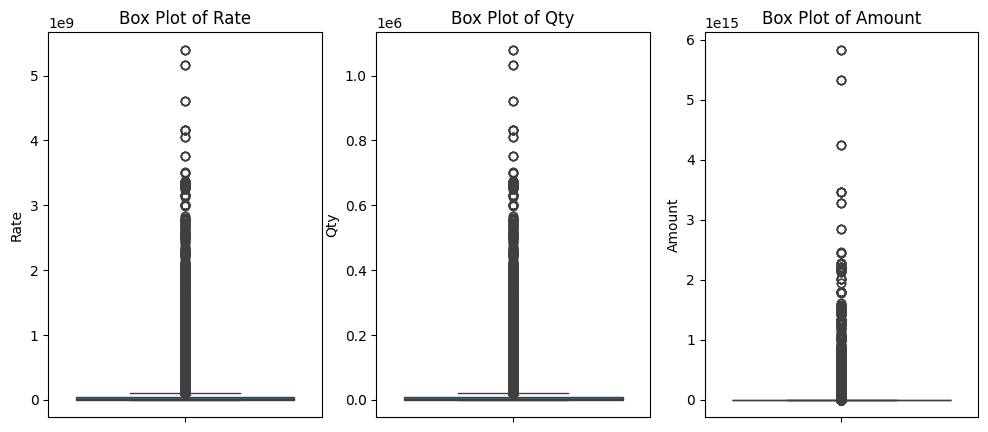

In [49]:
# Create subplots for box plots
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
sns.boxplot(data=df['Rate'], ax=axes[0])
axes[0].set_title('Box Plot of Rate')
sns.boxplot(data=df['Qty'], ax=axes[1])
axes[1].set_title('Box Plot of Qty')
sns.boxplot(data=df['Amount'], ax=axes[2])
axes[2].set_title('Box Plot of Amount')
plt.show()


In [50]:
#checking for the missing values in 'Qty'
df['Qty'].isnull().sum()

np.int64(0)

In [51]:
#checking datatype of 'Qty'
df['Qty'].dtype

dtype('float64')

In [52]:
#checking for the missing values in 'Rate'
df['Rate'].isnull().sum()

np.int64(0)

In [53]:
#checking datatype of 'Rate'
df['Rate'].dtype

dtype('float64')

# ***Scaling Data Using Standardization***

After Detecting and handling outlier now we have to scales the 'Qty' and 'Rate' columns using StandardScaler. This transforms the data to have zero mean and unit variance, which can improve the performance of some machine learning algorithms.

 **Standardization:** It transforms the data so that each feature has zero mean and unit variance (standard deviation of 1).

 Calculate Mean and Standard Deviation: The fit() method of StandardScaler calculates the mean and standard deviation of each feature (column) in the data.

Transform Data: The transform() method then applies the following transformation to each data point.

This effectively shifts the data so that the mean is zero and scales it so that the standard deviation is one.


In [67]:
# Create a copy of the DataFrame to avoid modifying the original
df_scaled = df[['Qty', 'Rate', 'Amount','ProdId','ProdDesc','Month','Year','Week']].copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data (use df_scaled within fit_transform)
df_scaled[['Qty', 'Rate', 'Amount']] = scaler.fit_transform(df_scaled[['Qty', 'Rate', 'Amount']])

# Print the scaled DataFrame
print(df_scaled)

# Print the shape of the original DataFrame
print(df.shape)


             Qty      Rate    Amount  ProdId  ProdDesc  Month  Year  Week
0      -0.583579 -0.311440 -0.099836     100       135      8  2023     2
1      -0.583579 -0.311440 -0.099836     101       135      8  2023     2
2      -0.583579 -0.311440 -0.099836     102       135      8  2023     2
3      -0.583579 -0.311440 -0.099836     103       134      8  2023     1
4      -0.583579 -0.311440 -0.099836     104       134      9  2023     2
...          ...       ...       ...     ...       ...    ...   ...   ...
171728 -0.532382 -0.293959 -0.099808  171828       798      5  2019     4
171729 -0.583579 -0.311440 -0.099836  171829      2012      6  2019     5
171730 -0.583579 -0.311440 -0.099836  171830      1348      6  2019     5
171731 -0.519417 -0.289577 -0.099793  171831      1368      8  2018     3
171732 -0.533864 -0.294460 -0.099810  171832      1818      8  2018     3

[171658 rows x 8 columns]
(171658, 9)


In [56]:
df.describe()

c:\syeda aliza arshad\project\myenv\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\syeda aliza arshad\project\myenv\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\syeda aliza arshad\project\myenv\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,TrnsDate,ProdId,ProdDesc,Qty,Rate,Amount
count,171658,171658.000000,171658.000000,171658.000000,1.716580e+05,1.716580e+05
mean,2022-07-11 05:18:28.282748160,85935.961854,1126.750906,7885.633775,6.218955e+07,8.745695e+12
min,2018-07-02 00:00:00,100.000000,0.000000,9.000000,5.000000e+01,5.000000e-01
25%,2020-12-11 00:00:00,43014.250000,566.000000,120.000000,6.000000e+05,7.200000e+07
50%,2023-01-11 00:00:00,85928.500000,1127.000000,2000.000000,1.000000e+07,2.000000e+10
75%,2024-02-24 00:00:00,128842.750000,1691.000000,8000.000000,4.000000e+07,3.200000e+11
max,2024-12-28 00:00:00,171832.000000,2246.000000,51000.000000,5.400000e+09,5.832000e+15
std,NaN,49565.065737,648.799360,13497.167059,1.996526e+08,8.760046e+13


In [57]:
df_scaled.tail(10)

,Qty,Rate,Amount,ProdId,ProdDesc
171723,-0.515934,-0.288400,-0.099788,171823,1175
171724,-0.515934,-0.288400,-0.099788,171824,896
171725,-0.524973,-0.291455,-0.099800,171825,1569
171726,-0.517564,-0.288950,-0.099790,171826,1148
171727,-0.517564,-0.288950,-0.099790,171827,995
171728,-0.532382,-0.293959,-0.099808,171828,798
171729,-0.583579,-0.311440,-0.099836,171829,2012
171730,-0.583579,-0.311440,-0.099836,171830,1348
171731,-0.519417,-0.289577,-0.099793,171831,1368
171732,-0.533864,-0.294460,-0.099810,171832,1818


This code gives comprehensive overview of the descriptive statistics and relationships between variables in your dataset.

In [58]:
print(df.shape)  # Shape of the original DataFrame
print(df_scaled.shape)  # Shape after scaling

(171658, 6)
(171658, 5)


In [59]:
df_scaled.head()

,Qty,Rate,Amount,ProdId,ProdDesc
0,-0.583579,-0.31144,-0.099836,100,135
1,-0.583579,-0.31144,-0.099836,101,135
2,-0.583579,-0.31144,-0.099836,102,135
3,-0.583579,-0.31144,-0.099836,103,134
4,-0.583579,-0.31144,-0.099836,104,134


In [ ]:
# Display the data in 'Rate' and 'Qty' columns
df[['Rate', 'Qty']].head(10)


,Rate,Qty
0,10000.0,1.0
1,10000.0,1.0
2,10000.0,1.0
3,10000.0,1.0
4,10000.0,1.0
...,...,...
396,100000.0,20.0
397,100000.0,20.0
398,100000.0,20.0
399,20000.0,4.0


In [60]:
# Check for non-numeric data types
non_numeric = df.select_dtypes(include=['object']).columns.tolist()


print(non_numeric)

[]


In [61]:
df.tail(4)

,TrnsDate,ProdId,ProdDesc,Qty,Rate,Amount
171729,2019-06-29,171829,2012,9.0,10000.0,1.000000e+04
171730,2019-06-29,171830,1348,9.0,10000.0,1.000000e+04
171731,2018-08-30,171831,1368,875.0,4375000.0,3.828125e+09
171732,2018-08-30,171832,1818,680.0,3400000.0,2.312000e+09


Feature Engineering:

In [66]:
# Extract year, month, day of week from 'TrnsDate'
df['Month'] = df['TrnsDate'].dt.month
df['Year'] = df['TrnsDate'].dt.year
df['Week'] = df['TrnsDate'].dt.day_of_week

Time series analysis:
It is used to analyze data points collected or recorded at specific time intervals. It's often used in forecasting, anomaly detection, and trend analysis.

Data Loading and Preprocessing:

A simple time series of monthly sales is created using pd.date_range to generate dates and np.random.randint for the sales data. 

Visualization:

The time series data is visualized using matplotlib to see the pattern and trends in the data.

Decomposition:

The seasonal_decompose function from statsmodels breaks the time series into trend, seasonal, and residual components. This helps understand the underlying patterns in the data.

ARIMA Model:

ARIMA (AutoRegressive Integrated Moving Average) is a commonly used model for time series forecasting.
The code uses ARIMA(1, 1, 1), where:
1: Number of lag observations for AR (AutoRegressive part)
1: Number of times to difference the data to make it stationary (Differencing part)
1: Size of the moving average window (Moving Average part)
The model is trained on the training data (train), and forecasts are made on the test data (test).

Model Evaluation:

The performance of the model is evaluated using Mean Squared Error (MSE), which measures how well the forecast matches the actual values. A lower MSE indicates better performance.

Forecast Visualization:

The forecasted sales are plotted alongside the training and test data to visualize how well the ARIMA model predicts future sales.

C:\Users\SyedArshad\AppData\Local\Temp\ipykernel_17876\331876267.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start="2020-01-01", periods=24, freq="M")


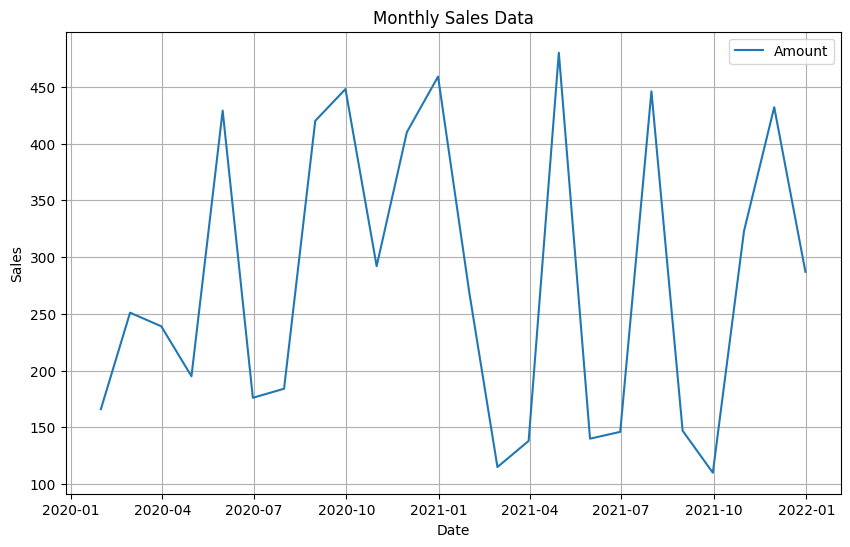

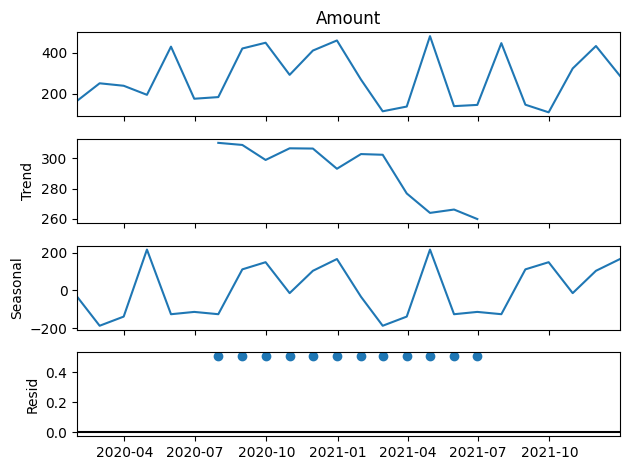

c:\syeda aliza arshad\project\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\syeda aliza arshad\project\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\syeda aliza arshad\project\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 14734.648683367905


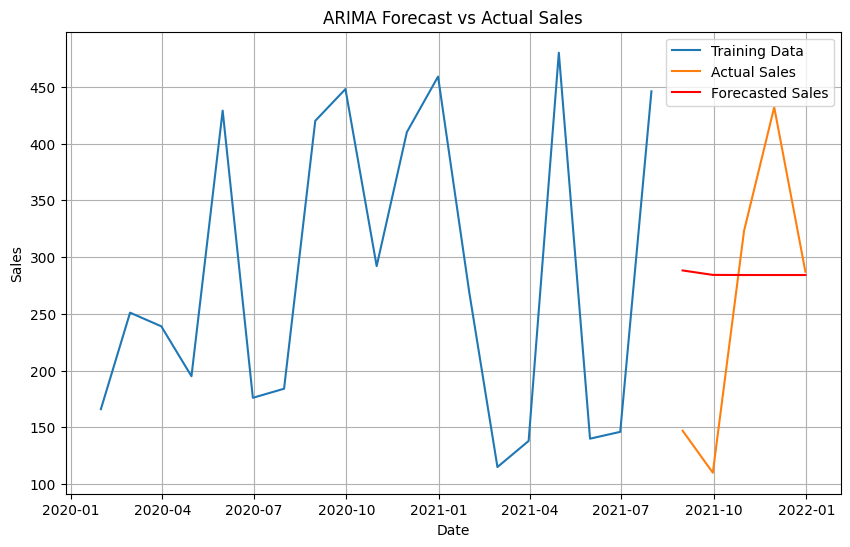

In [117]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from datetime import datetime

# Step 1: Load and preprocess the data

# Example: Creating a simple time series (monthly sales data)
dates = pd.date_range(start="2020-01-01", periods=24, freq="M")
sales = np.random.randint(100, 500, size=24)  # Simulating sales data

# Create a DataFrame
df = pd.DataFrame({'TrnsDate': dates, 'Amount': sales})
df.set_index('TrnsDate', inplace=True)

# Step 2: Visualize the time series data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Amount'], label='Amount')
plt.title('Monthly Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Decompose the time series (Trend, Seasonal, Residual)
decomposition = seasonal_decompose(df['Amount'], model='additive', period=12)
decomposition.plot()
plt.show()

# Step 4: Fit an ARIMA model
# ARIMA model requires the data to be stationary (constant mean, variance over time), so we need to check and differentiate if needed

# Differencing to make the series stationary
df['Amount_diff'] = df['Amount'].diff().dropna()

# Split the data into training and testing
train_size = int(len(df) * 0.8)
train, test = df['Amount'][:train_size], df['Amount'][train_size:]

# Fit ARIMA Model (parameters p, d, q)
# p - the number of lag observations in the model (AR)
# d - the number of times that the raw observations are differenced (I)
# q - the size of the moving average window (MA)

# Here we will use ARIMA(1,1,1) for simplicity
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Forecast the sales using the trained model
forecast = model_fit.forecast(steps=len(test))

# Step 5: Evaluate the model
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error: {mse}")

# Visualize the forecast vs actual
plt.figure(figsize=(10, 6))
plt.plot(df.index[:train_size], train, label='Training Data')
plt.plot(df.index[train_size:], test, label='Actual Sales')
plt.plot(df.index[train_size:], forecast, label='Forecasted Sales', color='red')
plt.title('ARIMA Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


In [63]:
df.head()

,TrnsDate,ProdId,ProdDesc,Qty,Rate,Amount,Month,Year
0,2023-08-02,100,135,9.0,10000.0,10000.0,8,2
1,2023-08-02,101,135,9.0,10000.0,10000.0,8,2
2,2023-08-02,102,135,9.0,10000.0,10000.0,8,2
3,2023-08-08,103,134,9.0,10000.0,10000.0,8,1
4,2023-09-13,104,134,9.0,10000.0,10000.0,9,2


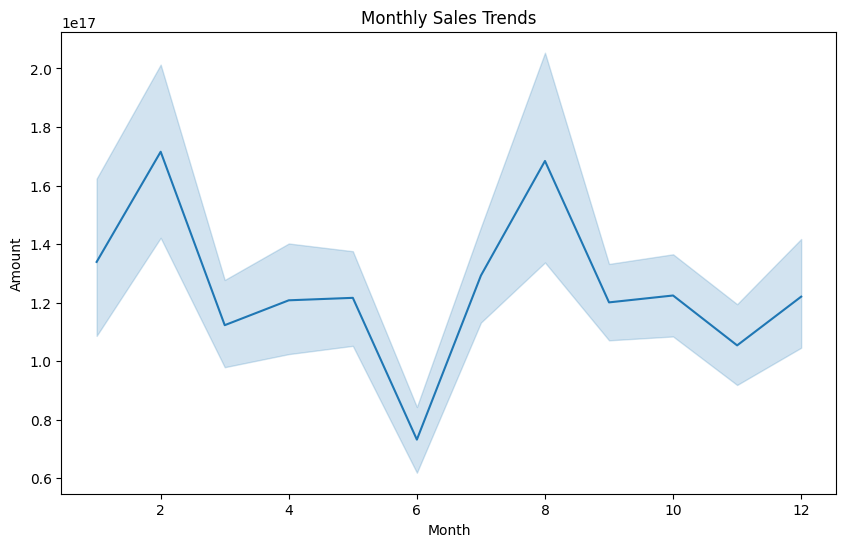

In [64]:
# Plot sales trends over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Amount', data=df, estimator='sum')
plt.title('Monthly Sales Trends')
plt.show()

In [65]:
print(df.columns)

Index(['TrnsDate', 'ProdId', 'ProdDesc', 'Qty', 'Rate', 'Amount', 'Month',
       'Year'],
      dtype='object')


# ***Split the Data into Training and Testing Sets***

In [68]:
# Define the features (independent variables): Quantity and Rate
X = df_scaled.drop(['Amount'], axis=1) # Assuming your dataset has columns 'Quantity' and 'Rate'

# Define the target (dependent variable): Amount
y = df_scaled['Amount']  # 'Amount' is the target variable representing sales

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing data successfully split.")


Training and testing data successfully split.


In [76]:
X_train_scaled.shape

(137326, 7)

In [77]:
y_train.shape

(137326,)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   TrnsDate  1048575 non-null  datetime64[ns]
 1   ProdId    1048575 non-null  int64         
 2   ProdDesc  1048575 non-null  int64         
 3   Qty       1048575 non-null  float64       
 4   Rate      1048575 non-null  float64       
 5   Amount    1048575 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 48.0 MB


# ***Scaling Only After Splitting***

In [69]:
# Fit the scaler on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling to test data
X_test_scaled = scaler.transform(X_test)


In [78]:
# Display results
print("Features after scaling:")
print(X_train_scaled)

print("\nFeature DataFrame:")
print(df)

Features after scaling:
[[-0.41058727 -0.25189118  0.34625836 ... -0.40246307 -0.02156411
  -0.86103017]
 [-0.53972543 -0.29544388  1.43922177 ... -0.11091258 -1.09372677
  -0.86103017]
 [ 0.0807315  -0.08619068  0.72609126 ...  1.63839035 -1.09372677
   0.30974476]
 ...
 [-0.40613423 -0.25038936  0.93351143 ...  0.18063791 -1.09372677
   0.30974476]
 [ 0.53457051  0.06686953  1.23515294 ... -1.56866502 -1.09372677
  -0.2756427 ]
 [ 1.64226425  0.44044656  0.73214791 ... -0.40246307 -0.55764544
   0.89513223]]

Feature DataFrame:
         TrnsDate  ProdId  ProdDesc    Qty       Rate        Amount  Month  \
0      2023-08-02     100       135    9.0    10000.0  1.000000e+04      8   
1      2023-08-02     101       135    9.0    10000.0  1.000000e+04      8   
2      2023-08-02     102       135    9.0    10000.0  1.000000e+04      8   
3      2023-08-08     103       134    9.0    10000.0  1.000000e+04      8   
4      2023-09-13     104       134    9.0    10000.0  1.000000e+04      9

In [88]:
X_train_scaled.shape

(137326, 7)

In [89]:
X_test_scaled.shape

(34332, 7)

# **MODEL SELECTION:**

**Time Series Models:**
If you're forecasting future sales, consider time series models like ARIMA, Prophet, or SARIMA.

**Regression Models:**
Linear regression, decision trees, random forests, and support vector machines can also be effective for sales prediction.

**Neural Networks:**
For complex relationships and large datasets, consider neural networks (e.g., feedforward neural networks, recurrent neural networks).

**k-Nearest Neighbors:**
When dealing with small to medium-sized datasets with clear decision boundaries. However, it's important to consider its limitations, especially for large or high-dimensional data.

# ***Train The Data Random Forest Regressor***

***R²***  measures the proportion of variance in the dependent variable (target) that is predictable from the independent variables (features).


*   A value of 0 means the model predicts no better than the mean of the target values.

*   A value closer to 1 indicates a better fit (high accuracy).


*   Negative values indicate that the model performs worse than simply predicting the mean.


***MSE***  calculates the average squared difference between predicted and actual values. Smaller values are better as they indicate predictio
ns are closer to the actual values.


*    Lower MSE signifies higher accuracy.

***MAE***  is especially useful when you want a simple and interpretable measure of error without emphasizing large errors as MSE does.




In [90]:
# Train Random Forest Regressor
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train_scaled, y_train)  # Fit regression model
y_pred = rfr.predict(X_test_scaled)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 6.223856891035376e-05
R-squared: 0.9999247170912393


# ***Train The Data XG BOOST REGRESSOR***

In [ ]:
import xgboost as xgb

# Train XGBoost Regressor
xbg = xgb.XGBRegressor(random_state=42)
xbg.fit(X_train_scaled, y_train)  # Fit regression model
y_pred = xbg.predict(X_test_scaled)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.5341771927872038
R-squared: 0.3538666847474433


In [52]:
print(df.columns)

Index(['TrnsDate', 'ProdId', 'ProdDesc', 'Qty', 'Rate', 'Amount'], dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168978 entries, 0 to 171732
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   TrnsDate  168978 non-null  datetime64[ns]
 1   ProdId    168978 non-null  object        
 2   ProdDesc  168978 non-null  object        
 3   Qty       168978 non-null  float64       
 4   Rate      168978 non-null  float64       
 5   Amount    168978 non-null  float64       
 6   Month     168978 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), object(2)
memory usage: 9.7+ MB


# ***Train The Data Using Linear Regression***

In [92]:
from sklearn.linear_model import LinearRegression

#Applying linear regression
#Train the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)  # Fit regression model
y_pred = lr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics

print("\nLinearRegression:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


LinearRegression:
Mean Squared Error: 0.11800371484684856
R-squared: 0.8572643450232716


# ***TRAIN AND TESTING DATA USING NEURAL NETWORK***

In [84]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score

In [94]:
# Neural Network Regressor
# Multi-Layer Perceptron (MLP) Regressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(50,), max_iter=100, random_state=42, early_stopping=True, validation_fraction=0.1, n_iter_no_change=10)
mlp_regressor.fit(X_train_scaled, y_train)
mlp_y_pred = mlp_regressor.predict(X_test_scaled)
mlp_mse = mean_squared_error(y_test, mlp_y_pred)
mlp_r2 = r2_score(y_test, mlp_y_pred)


print("\nMLP Regressor:")
print(f"  Mean Squared Error: {mlp_mse}")
print(f"  R-squared: {mlp_r2}")


MLP Regressor:
  Mean Squared Error: 6.29834153932276e-05
  R-squared: 0.999923816135276


# ***Train The Data Using KNN Regressor***

In [93]:
# Train the KNN model
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_scaled, y_train)

# Make predictions
knn_y_pred = knn_regressor.predict(X_test_scaled)

# Evaluate the model's performance
knn_mse = mean_squared_error(y_test, knn_y_pred)
print(f"KNN MSE: {knn_mse}")

knn_r2 = r2_score(y_test, knn_y_pred)
print(f"KNN R-squared: {knn_r2}")

KNN MSE: 0.003185068039349402
KNN R-squared: 0.9961473859248243


In [95]:
df.sample(5)

,TrnsDate,ProdId,ProdDesc,Qty,Rate,Amount,Month,Year,Week
89034,2023-06-15,89134,1988,2400.0,12000000.0,2.880000e+10,6,2023,3
134168,2020-12-19,134268,740,11500.0,57500000.0,6.612500e+11,12,2020,5
87656,2023-03-16,87756,785,288.0,1440000.0,4.147200e+08,3,2023,3
137838,2020-05-06,137938,1341,13200.0,66000000.0,8.712000e+11,5,2020,2
72819,2024-09-19,72919,1583,2250.0,11250000.0,2.531250e+10,9,2024,3


In [98]:
print(X_train_scaled.shape)  # This should show (n_samples, 5)


(137326, 7)


In [ ]:
df.head(190)

In [100]:
print(X_train.dtypes)

Qty         float64
Rate        float64
ProdId        int64
ProdDesc      int64
Month         int32
Year          int32
Week          int32
dtype: object


In [114]:
print(df['TrnsDate'].unique())

<DatetimeArray>
['2023-08-02 00:00:00', '2023-08-08 00:00:00', '2023-09-13 00:00:00',
 '2023-11-01 00:00:00', '2023-11-22 00:00:00', '2023-12-26 00:00:00',
 '2024-01-15 00:00:00', '2024-01-24 00:00:00', '2024-02-12 00:00:00',
 '2024-05-20 00:00:00',
 ...
 '2018-11-28 00:00:00', '2018-11-17 00:00:00', '2019-06-22 00:00:00',
 '2019-04-20 00:00:00', '2018-07-07 00:00:00', '2018-10-06 00:00:00',
 '2018-12-02 00:00:00', '2018-10-25 00:00:00', '2019-04-29 00:00:00',
 '2018-10-31 00:00:00']
Length: 1983, dtype: datetime64[ns]


In [102]:
#Checking the missing values in each column of your Dataset
data_df= df[['TrnsDate', 'ProdId', 'ProdDesc', 'Qty', 'Rate', 'Amount', 'Year','Month']].isnull().sum()

print(data_df)

TrnsDate    0
ProdId      0
ProdDesc    0
Qty         0
Rate        0
Amount      0
Year        0
Month       0
dtype: int64



# **Cross Validation**


R-squared (R²) is a statistical measure that indicates how well the model explains the variance in the target variable (dependent variable). It ranges from 0 to 1, where:
1 means the model perfectly explains the variance of the data.
0 means the model does not explain any variance, and the model predictions are no better than just predicting the mean of the target variable.
Negative values suggest that the model performs worse than a simple mean-based model.


The mean R² score is the average R² score across all 5 folds of the cross-validation.

In [105]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# Create a pipeline to scale and then train
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling step
    ('knn_regressor', KNeighborsRegressor())  # Model step
])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')

print(f"Cross-Validation R-squared Scores: {cv_scores}")
print(f"Mean R-squared: {cv_scores.mean()}")


Cross-Validation R-squared Scores: [0.99625707 0.99666899 0.99568005 0.99587947 0.99360736]
Mean R-squared: 0.9956185857269195


**Explained Variance:** Often used to understand how well a model explains the variation in the dependent variable, commonly in regression tasks.

**Mean Absolute Percentage Error (MAPE):** MAPE measures the average error between the predicted and actual values, expressed as a percentage. A lower MAPE means better prediction accuracy.

**Root Mean Squared Error (RMSE):** Widely used to assess the performance of regression models, with smaller values indicating better model performance.

**KNN R-squared (Accuracy):** How well the model explains the variance in the data.

Explained Variance Score

In [106]:
from sklearn.metrics import explained_variance_score

explained_variance = explained_variance_score(y_test, knn_y_pred)
print(f"Explained Variance: {explained_variance:.2f}")

Explained Variance: 1.00


Mean Absolute Percentage Error (MAPE)

In [107]:
# Calculate MAPE
mape = (abs((y_test - knn_y_pred) / y_test).mean()) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 4.06%


Root Mean Squared Error (RMSE)

In [108]:
rmse = np.sqrt(mean_squared_error(y_test, knn_y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 0.06


R - Squared

In [109]:
knn_r2 = r2_score(y_test, knn_y_pred)
print(f"KNN R-squared (Accuracy): {knn_r2:.2f}")

KNN R-squared (Accuracy): 1.00


**Random Predictions**

Testing Model Predictions with Random Inputs


To check how well the model predicts values for new.

These additional metrics and tests help you comprehensively evaluate your regression models and understand their performance beyond R² and MAE.



In [110]:
# not put the values of target column "Amount" and datetime format column "Trnsdate"
input= (89134,	1988,	2400.0,	12000000.0, 6,	2023,	3)
new_input=np.asanyarray(input, dtype=float)
prediction= knn_regressor.predict(new_input.reshape(1,-1))
print(prediction)

[1.77029652]


***Precision:*** The fraction of relevant instances among the retrieved instances.

***Recall:*** The fraction of relevant instances that have been retrieved over the total amount of relevant instances.



In [111]:
from sklearn.metrics import precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier

def evaluate_model_precision_recall(model, X_train_scaled, y_train, threshold=0.5):
    # Convert continuous target to binary (0 or 1) using threshold
    y_train_binary = (y_train > threshold).astype(int)

    # Fit the model to the training data
    model.fit(X_train_scaled, y_train_binary)

    # Make predictions on the training data
    predictions = model.predict(X_train_scaled)

    # Calculate precision and recall
    precision = precision_score(y_train_binary, predictions)
    recall = recall_score(y_train_binary, predictions)

    # Print the metrics
    print(f"Model: {model.__class__.__name__}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("---------------------")

# Example with KNN classifier (assuming y_train is continuous)
model = KNeighborsClassifier(n_neighbors=5)
evaluate_model_precision_recall(model, X_train_scaled, y_train)



Model: KNeighborsClassifier
Precision: 0.98
Recall: 0.96
---------------------


# **Grid Search in Model Linear Regression**

**Purpose of Grid Search for Hyperparameter Tuning:**



1.   To find the best combination of hyperparameters that maximize model performance on the validation set.

2.   Default hyperparameters may not always yield optimal performance, so fine-tuning is necessary for better predictions.






In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Define the parameter grid (adjusted for LinearRegression)
param_grid = {
    'fit_intercept': [True, False]  # Whether to calculate the intercept
}

# Create a Linear Regression model
model = LinearRegression()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to your data (assuming X_train_scaled and y_train are available)
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score (Neg Mean Squared Error): ", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model (example using R-squared)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Best Parameters:  {'fit_intercept': False}
Best Score (Neg Mean Squared Error):  -0.18319367743752007
R-squared: 0.8572646674976677


# **Grid search in model KNN**

KNN Parameters:  This is the number of neighbors used by the KNN algorithm to make predictions. The algorithm classifies a data point based on the majority class (for classification) or the average (for regression) of its 27 closest neighbors. This indicates that the optimal number of neighbors for your dataset is 27.

KNN Score:  This score could represent the R-squared (R²), which tells you how well the model explains the variance in the target variable. In this case, the score indicates that around 90.14% of the variability in the target is explained by the model, which is an excellent result.

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Define the parameter grid
param_grid = {'n_neighbors': list(range(1, 31))}

# Create a KNN model
knn = KNeighborsRegressor()

# Perform grid search
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and score
print("Best KNN Parameters:", grid_search.best_params_)
print("Best KNN Score:", grid_search.best_score_)

Best KNN Parameters: {'n_neighbors': 1}
Best KNN Score: 0.9974839905898477


# **Grid Search in Neural Network**

Best Score: his is the negative mean squared error (MSE) during cross-validation (since we are using scoring='neg_mean_squared_error' in GridSearchCV). The negative sign is used because scikit-learn always tries to maximize the score, and a lower MSE is better. So, this value indicates the lowest error the model achieved during the cross-validation process.


MSE represents the average squared difference between the predicted values and the actual values. A lower MSE means better predictions. Here, the MSE value is quite small, indicating that the model's predictions are very close to the true values.


R² is a measure of how well the model explains the variability of the target variable. It ranges from 0 to 1, with 1 indicating perfect predictions. An R² of 0.89 means that approximately 89% of the variance in the target variable is explained by the model. This is an excellent result, showing that the model has good predictive power.

In [118]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

param_grid = {
    'hidden_layer_sizes': [[64]],  # Fewer layer sizes to test
    'activation': ['relu'],  # Only testing 'relu' for simplicity
    'solver': ['adam'],  # Only testing 'adam' for simplicity
    'alpha': [0.0001],  # Reduced to only one value for L2 penalty
}
# Create the MLPRegressor
mlp_regressor = MLPRegressor(max_iter=500, random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=mlp_regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Neg Mean Squared Error):", grid_search.best_score_)

# Train the model with the best parameters
best_mlp_regressor = MLPRegressor(**grid_search.best_params_, max_iter=500, random_state=42)
best_mlp_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set
mlp_y_pred = best_mlp_regressor.predict(X_test_scaled)

# Evaluate the model
mlp_mse = mean_squared_error(y_test, mlp_y_pred)
mlp_r2 = r2_score(y_test, mlp_y_pred)

print("\nMLP Regressor with Best Parameters:")
print(f"  Mean Squared Error: {mlp_mse}")
print(f"  R-squared: {mlp_r2}")

Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': [64], 'solver': 'adam'}
Best Score (Neg Mean Squared Error): -0.00024733197261285955

MLP Regressor with Best Parameters:
  Mean Squared Error: 0.00017134871021187492
  R-squared: 0.9997927389793342


In [121]:
import joblib

# Save the model
joblib.dump(knn_regressor, 'model.joblib')  # Save the model to 'model.joblib'


['model.joblib']